In [1]:
from cdl_helper import read_in_all_matches 
from cdl_helper import CDL_PALETTE as pal
import seaborn as sns
import matplotlib.pyplot as plt

data = read_in_all_matches()
data.sample(4)

,gameMap,gameMode,id,programId,firstName,lastName,alias,headshot,socialNetworkHandles,averageSpeed,...,matchGame.gameMap.publishDetails.time,matchGame.gameMap.publishDetails.user,matchGameResult.hostGameScore,matchGameResult.guestGameScore,matchGameResult.winnerTeamId,matchGameResult.loserTeamId,event,setting,totalHeadshots,totalTiersCaptured
14,Breenbergh Hotel,CDL SnD,517,2,Thomas,Ernst,Scrap,https://www.callofduty.com/content/dam/activis...,[],85.179092,...,2022-12-05T10:02:00.334Z,blte5475d8d4c1a4efe,2.0,6.0,69.0,17.0,M2Event,lan,NaN,NaN
31,Zarqwa Hydroelectric,CDL Hardpoint,572,2,Daniel,Rothe,Ghosty,https://telescope.callofduty.com/ts/codp/conte...,[],190.562408,...,2022-12-05T10:02:29.302Z,blte5475d8d4c1a4efe,250.0,170.0,17.0,6.0,M3Event,lan,NaN,NaN
4,Mercado Las Almas,CDL Hardpoint,120,2,Cesar,Bueno,Skyz,https://www.callofduty.com/content/dam/activis...,"[{'socialNetworkType': 'TWITTER', 'handle': 'h...",192.117661,...,2022-12-05T10:02:39.877Z,blte5475d8d4c1a4efe,250.0,173.0,13.0,17.0,M1Qual,online,NaN,NaN
17,Al Bagra Fortress,CDL Control,42,2,Anthony,Cuevas-Castro,Shotzzy,https://www.callofduty.com/content/dam/activis...,"[{'socialNetworkType': 'TWITTER', 'handle': 'h...",204.479111,...,2022-12-05T10:03:45.339Z,blte5475d8d4c1a4efe,3.0,2.0,69.0,6.0,M2Event,lan,NaN,NaN


In [2]:
data['matchDesc'] = [f"{a} (vs {b})\n{event}" for a, b, event in zip(data['abbrev'], data['oppo_abbrev'], data['event'])]
data['matchDesc'][:3]

0    ATL (vs BOS)\nM1Qual
1    BOS (vs ATL)\nM1Qual
2    ATL (vs BOS)\nM1Qual
Name: matchDesc, dtype: object

In [3]:
grouped = data.groupby(['matchDesc', 'matchGame.matchId', 'abbrev']).sum()
grouped.reset_index(inplace=True)

In [4]:
grouped['friendDamage'][:3]

0    279.0
1    518.0
2     83.0
Name: friendDamage, dtype: float64

In [5]:
grouped = grouped.sort_values(by='friendDamage', ascending=False)

Text(0.5, 0, '{Team} (vs {Opposition})\n{Event}')

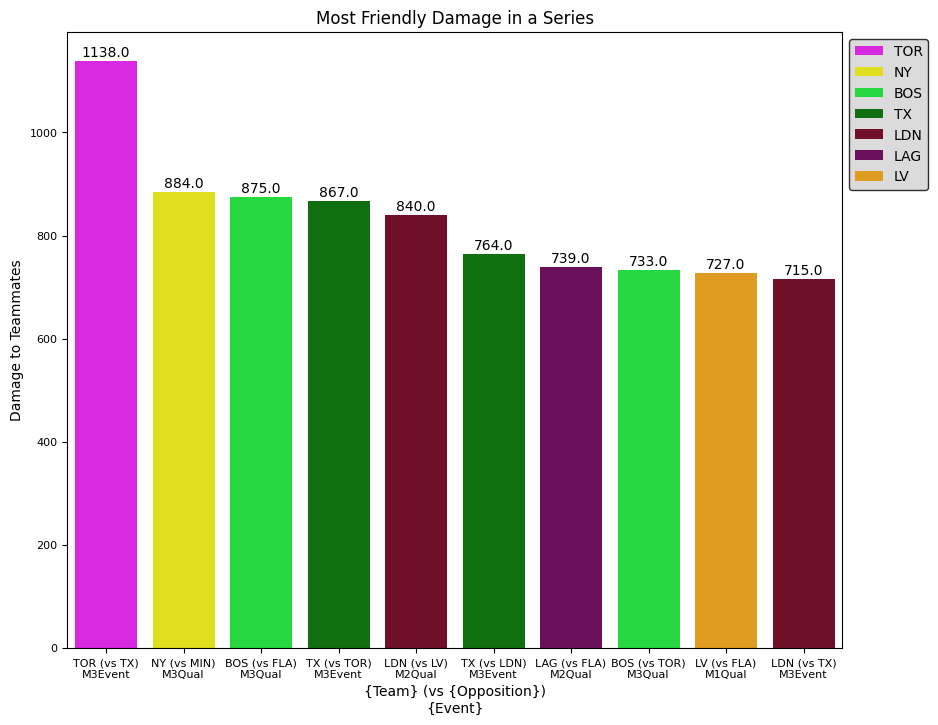

In [6]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.subplots()
sns.barplot(data=grouped.iloc[0:10], x='matchDesc', y='friendDamage', hue='abbrev', palette=pal, ax=ax1, dodge=False)
ax1.tick_params(labelsize=8)

for x, y, in zip(ax1.get_xticks(), grouped.iloc[0:10]['friendDamage']):
    ax1.text(x, y+9, y, horizontalalignment='center')

frame = ax1.legend(bbox_to_anchor=(1, 1)).get_frame()
frame.set_color('lightgrey')
frame.set_edgecolor('black')
ax1.set_ylabel("Damage to Teammates")
ax1.set_title("Most Friendly Damage in a Series")
ax1.set_xlabel("{Team} (vs {Opposition})\n{Event}")

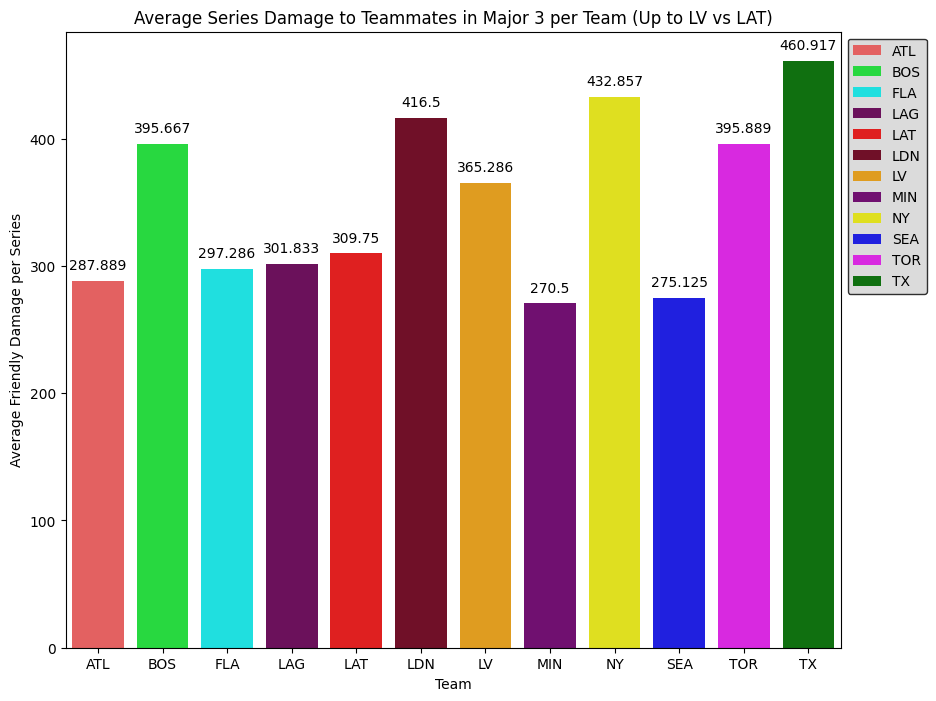

In [7]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.subplots()

m3_data = data[data['event'].isin(['M3Event', 'M3Qual'])]
team_average = m3_data.groupby(["abbrev", "matchDesc", "matchGame.matchId"]).sum().reset_index()
t_av = team_average[['abbrev', 'friendDamage']].groupby("abbrev").mean().reset_index()
sns.barplot(data=t_av, x='abbrev', y='friendDamage', hue='abbrev', palette=pal, dodge=False, ax=ax1)

for x, y, in zip(ax1.get_xticks(), t_av['friendDamage']):
    ax1.text(x, y+9, round(y, 3), horizontalalignment='center')

ax1.set_xlabel("Team")
ax1.set_ylabel("Average Friendly Damage per Series")
ax1.set_title("Average Series Damage to Teammates in Major 3 per Team (Up to LV vs LAT)");

frame = ax1.legend(bbox_to_anchor=(1, 1)).get_frame()
frame.set_color('lightgrey')
frame.set_edgecolor('black')

In [8]:
m3_data = data[data['event'].isin(['M3Event', 'M3Qual'])]
m3_team = m3_data.groupby(['gameMode', 'matchGame.matchId', 'abbrev']).sum().reset_index()
mode_team = m3_team[['gameMode', 'abbrev', 'friendDamage']].groupby(['gameMode', 'abbrev']).mean().reset_index().set_index('abbrev')

mode_team

,gameMode,friendDamage
abbrev,,
ATL,CDL Control,65.111111
BOS,CDL Control,108.555556
FLA,CDL Control,96.714286
LAG,CDL Control,100.666667
LAT,CDL Control,112.250000
LDN,CDL Control,99.166667
LV,CDL Control,169.571429
MIN,CDL Control,66.000000
NY,CDL Control,114.428571


In [9]:
mode_team = mode_team.pivot(columns='gameMode').reset_index().set_index('abbrev')
mode_team.columns = ['CDL Control', 'CDL Hardpoint', 'CDL SnD']
mode_team.reset_index()

mode_team['series'] = [h*2 + s*2 + c for h, s, c in zip(mode_team['CDL Hardpoint'], mode_team['CDL SnD'], mode_team['CDL Control'])]
mode_team.reset_index(inplace=True)
mode_team

,abbrev,CDL Control,CDL Hardpoint,CDL SnD,series
0,ATL,65.111111,192.444444,30.333333,510.666667
1,BOS,108.555556,255.111111,32.000000,682.777778
2,FLA,96.714286,148.000000,52.571429,497.857143
3,LAG,100.666667,132.166667,69.000000,503.000000
4,LAT,112.250000,172.750000,24.750000,507.250000
5,LDN,99.166667,269.666667,47.666667,733.833333
6,LV,169.571429,159.857143,35.857143,561.000000
7,MIN,66.000000,131.666667,72.833333,475.000000
8,NY,114.428571,218.142857,100.285714,751.285714
9,SEA,98.375000,119.625000,57.125000,451.875000


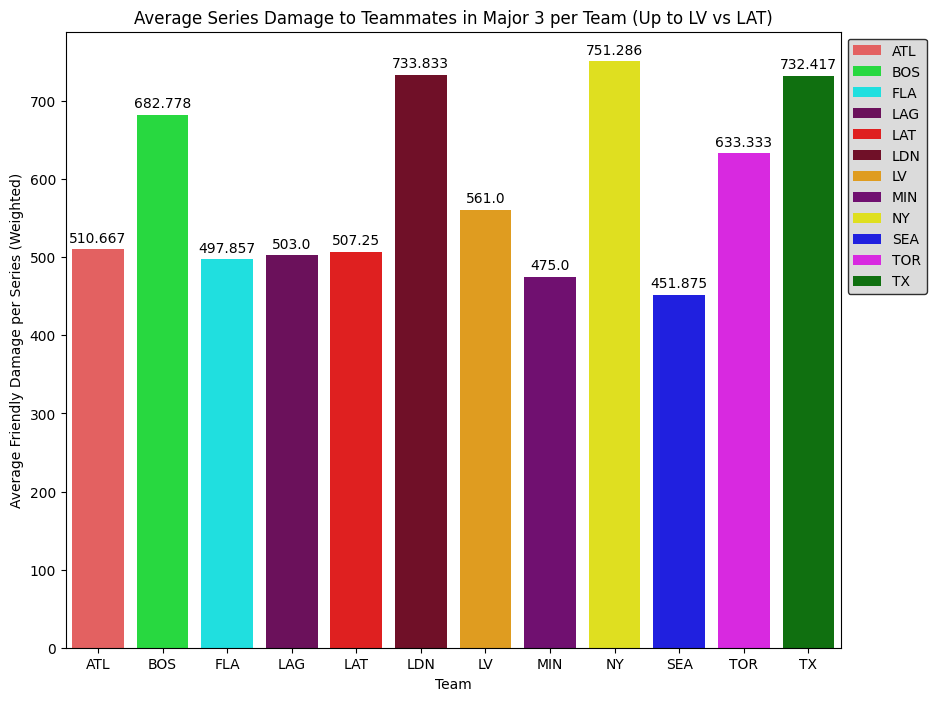

In [10]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.subplots()

sns.barplot(data=mode_team, x='abbrev', y='series', hue='abbrev', palette=pal, dodge=False, ax=ax1)

for x, y, in zip(ax1.get_xticks(), mode_team['series']):
    ax1.text(x, y+9, round(y, 3), horizontalalignment='center')

ax1.set_xlabel("Team")
ax1.set_ylabel("Average Friendly Damage per Series (Weighted)")
ax1.set_title("Average Series Damage to Teammates in Major 3 per Team (Up to LV vs LAT)");

frame = ax1.legend(bbox_to_anchor=(1, 1)).get_frame()
frame.set_color('lightgrey')
frame.set_edgecolor('black')

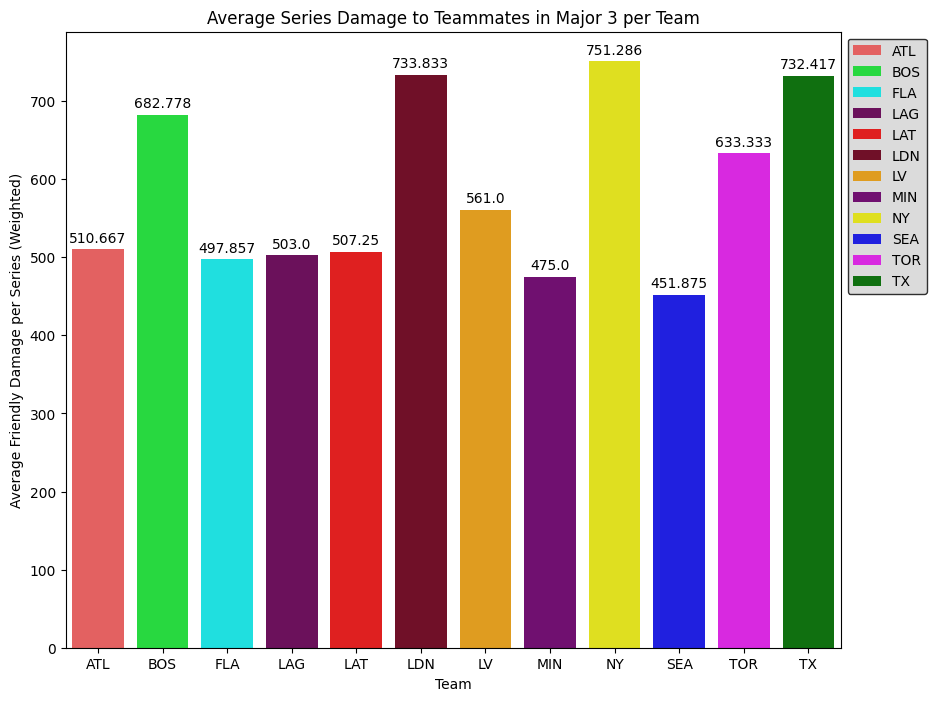

In [11]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.subplots()

sns.barplot(data=mode_team, x='abbrev', y='series', hue='abbrev', palette=pal, dodge=False, ax=ax1)

for x, y, in zip(ax1.get_xticks(), mode_team['series']):
    ax1.text(x, y+9, round(y, 3), horizontalalignment='center')

ax1.set_xlabel("Team")
ax1.set_ylabel("Average Friendly Damage per Series (Weighted)")
ax1.set_title("Average Series Damage to Teammates in Major 3 per Team");

frame = ax1.legend(bbox_to_anchor=(1, 1)).get_frame()
frame.set_color('lightgrey')
frame.set_edgecolor('black')